### Part 1 <br> ###
An island is inhabited by n people. Any two people are in regular contact with probability
p (and have no contact with probability 1 − p). The situation can be modelled as a graph
G = G(n, p) with n vertices, and each potential edge included with probability p. Let β0(G)
denote the number of connected components of the graph. Let χ(G) = V − E denote the
Euler characteristic of the graph, where V = n is the number of vertices and E is the number
of edges.

In [1]:
#!pip install networkx[default,extra]
#!pip install decorator==5.0.9

In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import igraph as ig
from collections import Counter
import math
import itertools

In [2]:
def random_graph(n, p):
    edges = itertools.combinations(range(n), 2)
    graph = nx.Graph()
    graph.add_nodes_from(range(n))
    if p <= 0:
        return graph
    if p >= 1:
        return nx.complete_graph(n, create_using=graph)
    for _, node_edges in itertools.groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        for e in node_edges:
            if random.random() < p:
                graph.add_edge(*e)
    return graph

In [3]:
n = 200
p = 0.025
graph = random_graph(n, p)

Graph with 200 nodes and 504 edges


Text(0.5, 1.0, '200 island inhabitants and their connections')

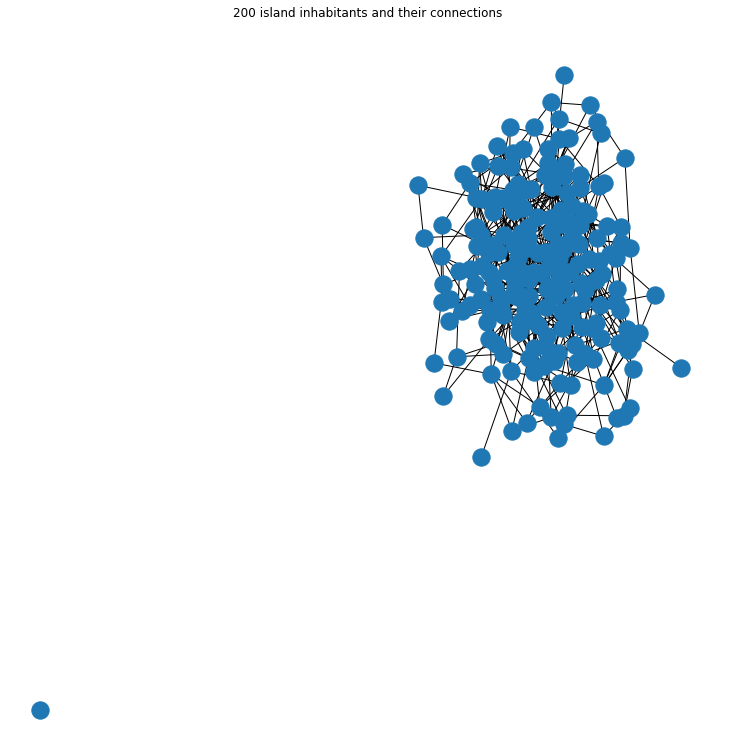

In [4]:
plt.figure(figsize=(10,10))
print(graph)
nx.draw(graph)
plt.title('200 island inhabitants and their connections')

1.(a) Use Python to plot a graph of p versus χ(G) for n = 200 vertices and 0 ≤ p ≤ 1.

In [5]:
def d(p,q):
    ""
    return np.sqrt(sum([p[i]-q[i]])**2 for i in range(len(p))) 

def distances(ps):
    ""
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)]for i in range(nps)])

def is_simplex(g, vs):
    ""
    for i in vs:
        for j in vs:
            if i != j and j not in g[i]:
                return False
    return True

def simplices(g,k):
    ""
    ss = []
    for i in g.keys():
        vvs = [j for j in g[i] if j>1]
        for subset in itertools.combinations(vvs, k):
            if is_simplex(g, subset):
                ss.append((i,) + subset)
    return ss


In [6]:
def question1func(nodes, verse):
    ""
    plt.figure(figsize=(10,10))
    n = nodes
    pxs = np.linspace(0,1, 100)
    pxs = [round(elem, 3) for elem in pxs]
    yxs = []
    if verse == "bZero":
        for i in pxs:
            graph = random_graph(n, i)
            gedgelist = nx.edges(graph)
            gnodelist = nx.nodes(graph)
            gedgenum = len(gedgelist)
            gnodenum = len(gnodelist)
            bZero = nx.number_connected_components(graph)
            yxs.append(bZero)
        
        
    elif verse == "XG":
        for i in pxs:
            graph = random_graph(n, i)
            gedgelist = nx.edges(graph)
            gnodelist = nx.nodes(graph)
            gedgenum = len(gedgelist)
            gnodenum = len(gnodelist)
            XG = gnodenum - gedgenum
            yxs.append(XG)
        
    elif verse == "bOne":
        for i in pxs:
            graph = random_graph(n, i)
            gedgelist = nx.edges(graph)
            gnodelist = nx.nodes(graph)
            gedgenum = len(gedgelist)
            gnodenum = len(gnodelist)
            bZero = nx.number_connected_components(graph)
            XG = gnodenum - gedgenum
            bOne = bZero - XG
            yxs.append(bOne)
    
    elif verse == "Virus":
        for i in pxs:
            graph = random_graph(n, i)
            gedgelist = nx.edges(graph)
            gnodelist = nx.nodes(graph)
            gedgenum = len(gedgelist)
            gnodenum = len(gnodelist)
            bZero = nx.number_connected_components(graph)
            XG = gnodenum - gedgenum
            bOne = bZero - XG
            if bZero != 1:
                yxs.append(0)
            elif bZero == 1:
                yxs.append(1)
            for i in yxs:
                if i == 1:
                    first = list.index(i)
                break
            
    
    return plt.plot(pxs,yxs)

Text(0.5, 1.0, 'P Values vs Euler Characteristic')

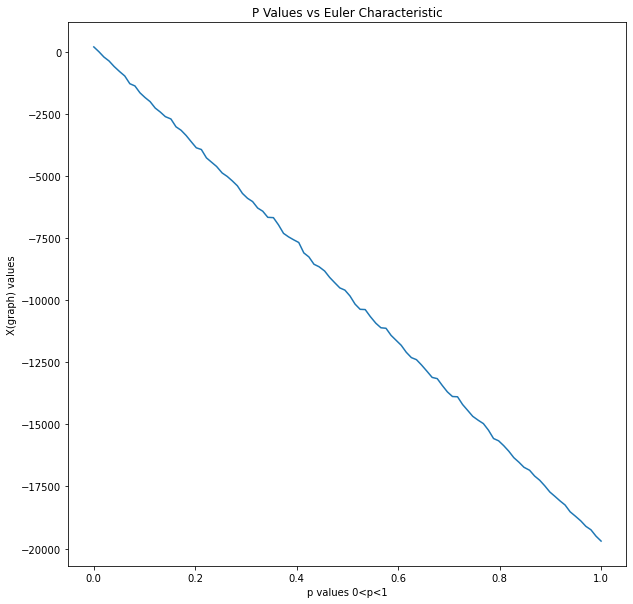

In [7]:
question1func(200, "XG")
plt.xlabel('p values 0<p<1')
plt.ylabel('X(graph) values')
plt.title('P Values vs Euler Characteristic')

Q1.(b) Use Python to plot a graph of p versus β0(G) for n = 200 vertices and 0 ≤ p ≤ 1.

Text(0.5, 1.0, 'P Values vs B0(graph)')

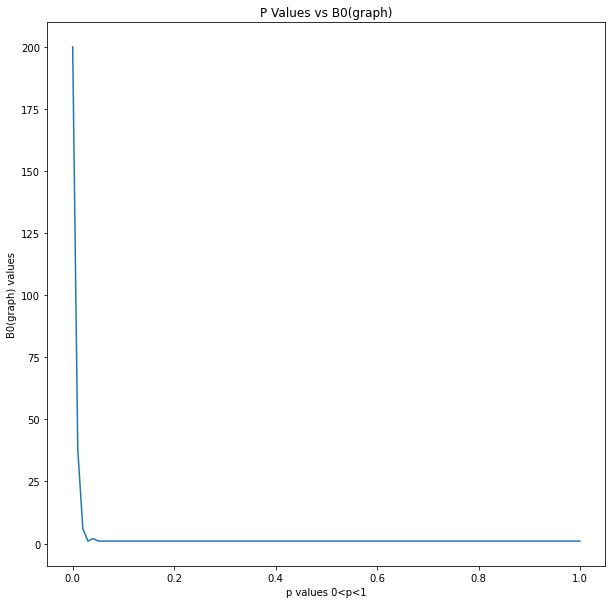

In [8]:
question1func(200, "bZero")
plt.xlabel('p values 0<p<1')
plt.ylabel('B0(graph) values')
plt.title('P Values vs B0(graph)')

Q1.(c) Use Python to plot a graph of p versus β1(G) = β0(G) − χ(G) for n = 200 vertices and
0 ≤ p ≤ 1.

Text(0.5, 1.0, 'P Values vs B1(graph)')

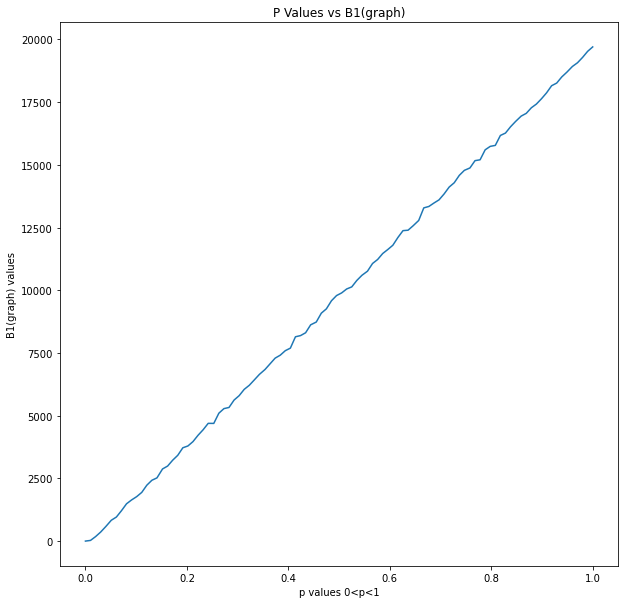

In [9]:
question1func(200, "bOne")
plt.xlabel('p values 0<p<1')
plt.ylabel('B1(graph) values')
plt.title('P Values vs B1(graph)')

(d) On an island with n = 200 inhabitants a random individual is infected with a virus.
Anyone in regular contact with an infected person becomes infected. Estimate the
smallest value of p for which the whole island becomes infected.

Text(0.5, 1.0, 'P Values vs Infected')

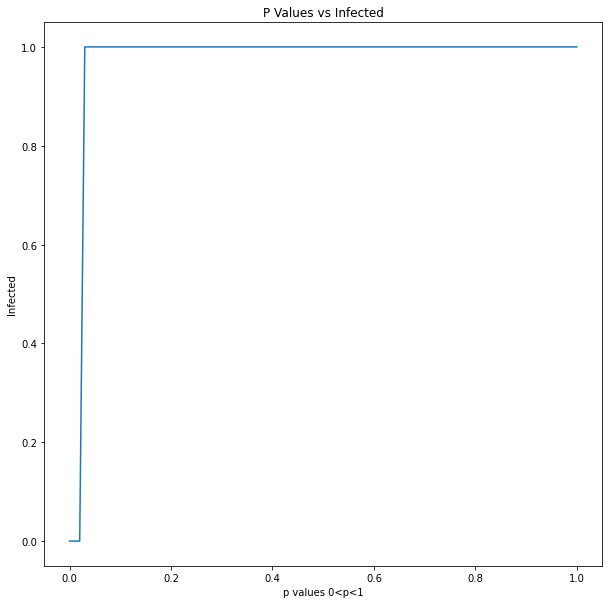

In [10]:
question1func(200, "Virus")
plt.xlabel('p values 0<p<1')
plt.ylabel('Infected')
plt.title('P Values vs Infected')

### Part 2  ###
For a set S of points in a metric space and for a real number  ≥ 0 let K = K(S, ) denote the
simplicial complex with vertex set S and whose k-simplices are the sets {x1, x2, . . . , xk+1} ⊂
S with 0 < d(xi
, xj ) ≤  for all 1 ≤ i < j ≤ k + 1. Let χ(K) = α0 − α1 + α2 − α3 + · · ·
denote the Euler characteristic of K, where αk is the number of k-simplices.

(a) Use Python to plot a graph of  versus χ(K) for 0 ≤  ≤ 9 and for S the set of 100 equally
spaced points on the straight line segment in R^4 joining the points P = (1, 1, 1, 1) and Q = (100, 100, 100, 100).

In [11]:
points = [(i,i) for i in range(1,101)]

def d(p,q):
    """the Euclidean distance between points p and q
    p and q are assumed to be lists/tuples, like (1,1,1,1), or  (4,4,4,4)"""
    
    return np.sqrt(sum([(p[i]-q[i])**2 for i in range(len(p))]))

def distances(ps):
    """returns a numpy array whose (i,j)th entry is the distance between ps[i] and ps[j]
    the entries ps[i] are assumed to be lists/tuples"""
    
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)] for i in range(nps)])

dists = distances(points)
print(dists)

[[  0.           1.41421356   2.82842712 ... 137.17871555 138.59292911
  140.00714267]
 [  1.41421356   0.           1.41421356 ... 135.76450199 137.17871555
  138.59292911]
 [  2.82842712   1.41421356   0.         ... 134.35028843 135.76450199
  137.17871555]
 ...
 [137.17871555 135.76450199 134.35028843 ...   0.           1.41421356
    2.82842712]
 [138.59292911 137.17871555 135.76450199 ...   1.41421356   0.
    1.41421356]
 [140.00714267 138.59292911 137.17871555 ...   2.82842712   1.41421356
    0.        ]]


In [12]:
def graph(distances,eps):
    """return the graph whose vertices are integers 0,1,2,... (one per row of the distance
    matrix distances) and where two vertices are connected if their distance is <= eps
    
    the graph is represented as a dictionary where the keys are vertices, and the values
    are lists of vertices neighbouring the key"""
    
    graph = {} # initialise an empty graph, we'll add edges one by one
    nverts = np.shape(distances)[0] # the number of vertices
    for i in range(nverts):
        graph[i] = [] # initialise the list of neighbours of the vertex i
        for j in range(nverts):
            if distances[i,j] <= eps and i != j:
                graph[i].append(j) # add {i,j} as an edge
    return graph

ex_graph = graph(dists,3)

In [13]:
def is_simplex(g, vs):
    """return true if the vertices vs is a complete graph"""
    for i in vs:
        for j in vs:
            if i != j and j not in g[i]:
                return False
    return True

def simplices(g, k):
    """find all k-simplices in the graph g"""
    ss = [] # initialise an empty list of simplices
    
    for i in g.keys():
        # we only consider simplices where i is the smallest vertex, so we don't double count
        vvs = [j for j in g[i] if j > i]
        for subset in itertools.combinations(vvs, k):
            if is_simplex(g,subset):
                ss.append((i,) + subset)
    return ss

sum1=0
for i in range(10):
    if i == 0:
        sum1 += len(simplices(ex_graph,i))
    else:
        sum1 -= len(simplices(ex_graph,i))
print(sum1)

-195


In [14]:
def sum_simplices(dists1,list_Evals):
    sum_list = []
    for E in list_Evals:
        
        graph1 = graph(dists1,E)
        sum1 = 0
        for i in range(10):
            #print("E = ", E, " i = ", i)
            if i%2 == 0:
                sum1 += len(simplices(graph1,i))
                #print("E = ", E," i = ", i, " sum1 = ", sum1)
            else:
                sum1 -= len(simplices(graph1,i))
                #print("E = ", E," i = ", i, " sum1 = ", sum1)
        sum_list.append(sum1)

    return sum_list

sum_simplices(dists,list(range(10)))


[100, 100, 1, 1, 1, 1, 1, 1, 1, 1]

Text(0, 0.5, 'X(K)')

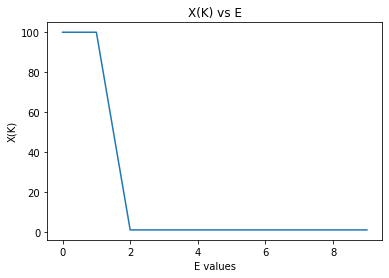

In [15]:
plt.plot(list(range(10)),sum_simplices(dists,list(range(10))))
plt.title("X(K) vs E")
plt.xlabel("E values")
plt.ylabel("X(K)")

(b) Use Python to plot a graph of E versus χ(K) for 0 ≤ E ≤ 0.4 and for S the set of 100 equally spaced points on the curve C = {(Cos(t), Cos(t), Sin(t), Sin(t) : t ∈ (−∞, ∞)} in R^4.

Text(0, 0.5, 'X(K)')

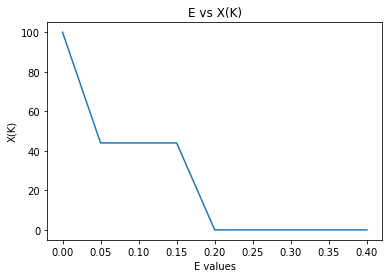

In [16]:
points2 = [(math.cos(t), math.cos(t), math.sin(t), math.sin(t)) for t in range(100)]
E2 = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
dists2 = distances(points2)
y2 = sum_simplices(dists2,E2)
plt.plot(E2, y2)
plt.title("E vs X(K)")
plt.xlabel("E values")
plt.ylabel("X(K)")